In [1]:
!pip install scikit-learn
!pip install nltk
!pip install pandas

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (40 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl (284 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('chapter6/text_data.csv')

In [4]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)
# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y=data['label']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
import numpy as np
train_dist = dict(zip(*np.unique(y_train, return_counts=True)))
test_dist = dict(zip(*np.unique(y_test, return_counts=True)))
print("Label distribution in training set:", train_dist)
print("Label distribution in test set:", test_dist)

### questo è l'output
#Label distribution in training set: {'AI': 23, 'Business': 18, 'Energy':8, 'Science': 15}
#Label distribution in test set: {'AI': 8, 'Business': 2, 'Energy': 2,'Science': 4}

Label distribution in training set: {'AI': np.int64(23), 'Business': np.int64(18), 'Energy': np.int64(8), 'Science': np.int64(15)}
Label distribution in test set: {'AI': np.int64(8), 'Business': np.int64(2), 'Energy': np.int64(2), 'Science': np.int64(4)}


In [7]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.62
Precision: 0.63
Recall: 0.71
F1 Score: 0.57


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/email.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)
data['processed_text'] = data ['text'].apply(preprocess)

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['label']

In [15]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
train_dist = dict(zip(*np.unique(y_train, return_counts=True)))
test_dist = dict(zip(*np.unique(y_test, return_counts=True)))
print("Label distribution in training set:", train_dist)
print("Label distribution in test set:", test_dist)

Label distribution in training set: {'Ham': np.int64(18), 'Spam': np.int64(14)}
Label distribution in test set: {'Ham': np.int64(2), 'Spam': np.int64(6)}


In [16]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Spam',average="weighted")
recall = recall_score(y_test, y_pred,pos_label='Spam',average="weighted")
f1 = f1_score(y_test, y_pred, pos_label='Spam',average="weighted")

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.83
Recall: 0.50
F1 Score: 0.50


/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/sentiment_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['sentiment']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
import numpy as np
train_dist = dict(zip(*np.unique(y_train, return_counts=True)))
test_dist = dict(zip(*np.unique(y_test, return_counts=True)))
print("Label distribution in training set:", train_dist)
print("Label distribution in test set:", test_dist)

Label distribution in training set: {'Negative': np.int64(36), 'Neutral': np.int64(32), 'Positive': np.int64(34)}
Label distribution in test set: {'Negative': np.int64(9), 'Neutral': np.int64(10), 'Positive': np.int64(7)}


In [32]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1 Score: 0.65


In [1]:
!pip install scikit-learn
!pip install nltk
!pip install pandas
!pip install gensim
!pip install scipy==1.12

  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (40 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-macosx

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/news_articles.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

In [5]:
corpus = [vectorizer.inverse_transform(doc) for doc in X]
dictionary = corpora.Dictionary(corpus)
corpus = [dictionary.doc2bow(text) for text in corpus]
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary,passes=15)

In [6]:
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
 print(f"Topic {idx}: {topic}")
topic_assignments = [lda_model[doc] for doc in corpus]
data['topic'] = [max(topics, key=lambda item: item[1])[0] for topics in topic_assignments]

Topic 0: 0.200*"t   o   d   a   y                                   s   t   o   c   k                                   m   a   r   k   e   t                               e   x   p   e   r   i   e   n   c   e   d           s   i   g   n   i   f   i   c   a   n   t           s   u   r   g   e                                   m   a   j   o   r                                   i   n   d   i   c   e   s                           r   e   a   c   h   i   n   g                       r   e   c   o   r   d                               h   i   g   h   s                                   " + 0.200*"l   o   c   a   l                                   f   o   o   t   b   a   l   l                       t   e   a   m                                       c   h   a   m   p   i   o   n   s   h   i   p       t   h   r   i   l   l   i   n   g                   f   i   n   a   l                                   m   a   t   c   h                                   " + 0.200*"g   o   v   e   r   n   m 

In [7]:
for idx, topic in topics:
 print(f"Topic {idx}: {topic}")
topic_assignments = [lda_model[doc] for doc in corpus]
data['topic'] = [max(topics, key=lambda item: item[1])[0] for topics in topic_assignments]
for index, row in data.iterrows():
 print(f"Article: {row['text'][:100]}...")
 print(f"Assigned Topic: {row['topic']}")

from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.2f}')

Topic 0: 0.200*"t   o   d   a   y                                   s   t   o   c   k                                   m   a   r   k   e   t                               e   x   p   e   r   i   e   n   c   e   d           s   i   g   n   i   f   i   c   a   n   t           s   u   r   g   e                                   m   a   j   o   r                                   i   n   d   i   c   e   s                           r   e   a   c   h   i   n   g                       r   e   c   o   r   d                               h   i   g   h   s                                   " + 0.200*"l   o   c   a   l                                   f   o   o   t   b   a   l   l                       t   e   a   m                                       c   h   a   m   p   i   o   n   s   h   i   p       t   h   r   i   l   l   i   n   g                   f   i   n   a   l                                   m   a   t   c   h                                   " + 0.200*"g   o   v   e   r   n   m 

/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/content_moderation_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
top_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='inappropriate')
recall = recall_score(y_test, y_pred, pos_label='inappropriate')
f1 = f1_score(y_test, y_pred, pos_label='inappropriate')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/user_interactions.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['category']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
classifier = NearestNeighbors(n_neighbors=5)
classifier.fit(X_train)

NearestNeighbors()

In [19]:
distances, indices = classifier.kneighbors(X_test)
y_train = np.array(y_train)
def get_majority_vote(neighbors):
 from collections import Counter
 majority_vote = Counter(neighbors).most_common(1)[0][0]
 return majority_vote
y_pred = [get_majority_vote(y_train[indices[i]]) for i in range(len(indices))]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.83
Precision: 0.86
Recall: 0.83
F1 Score: 0.84


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/support_tickets.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

In [23]:
y = data['category']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
classifier = GradientBoostingClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.90
Precision: 0.93
Recall: 0.90
F1 Score: 0.89


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/text_samples.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
classifier = GradientBoostingClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.90
Precision: 0.93
Recall: 0.90
F1 Score: 0.89


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/text_samples.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [34]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['category']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = GradientBoostingClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
param_grid = {
'n_estimators': [50, 100, 150],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


In [39]:
best_classifier = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_classifier, X_train, y_train,cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Average Cross-Validation Score: {cross_val_scores.mean():.2f}')

/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [1.     1.     0.9375 1.     1.    ]
Average Cross-Validation Score: 0.99


In [40]:
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.93


/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install tensorflow
!pip install nltk
!pip install pandas
!pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached charset_normalizer-3.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (34 kB)
  Using cached idna

In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
data = pd.read_csv('chapter6/text_samples.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
 return ' '.join(tokens)
data['processed_text'] = data['text'].apply(preprocess)

In [6]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['processed_text'])
X = tokenizer.texts_to_sequences(data['processed_text'])
X = pad_sequences(X, maxlen=100)
y = pd.get_dummies(data['category']).values

In [7]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
 tf.keras.layers.Conv1D(filters=128, kernel_size=5,
 activation='relu'),
 tf.keras.layers.MaxPooling1D(pool_size=2),
 tf.keras.layers.LSTM(100),
 tf.keras.layers.Dense(17, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=15, batch_size=32,validation_split=0.2)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.1042 - loss: 2.8252 - val_accuracy: 0.2500 - val_loss: 2.7879
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3646 - loss: 2.7809 - val_accuracy: 0.2500 - val_loss: 2.7538
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2917 - loss: 2.7459 - val_accuracy: 0.1250 - val_loss: 2.7148
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2188 - loss: 2.6890 - val_accuracy: 0.1250 - val_loss: 2.6737
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2083 - loss: 2.6230 - val_accuracy: 0.1250 - val_loss: 2.6409
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1771 - loss: 2.5953 - val_accuracy: 0.1875 - val_loss: 2.5689
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3125 - loss: 2.4887 - val_accuracy: 0.2500 - val_loss: 2.4655
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4271 - loss: 2.4044 - val_accuracy: 0.3750 - val_loss: 2.3468

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes,average='weighted')
recall = recall_score(y_test_classes, y_pred_classes,average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Accuracy: 0.80
Precision: 0.73
Recall: 0.80
F1 Score: 0.75


/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.4 MB/s eta 0:00:00


In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report, roc_curve
import matplotlib.pyplot as plt
data = pd.read_csv('chapter6/evaluation_data.csv')
y_true = data['true_label']
y_pred = data['predicted_label']

In [12]:
conf_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [13]:
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [14]:
precision = precision_score(y_true, y_pred,average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.87


In [15]:
recall=recall_score(y_true,y_pred,average="weighted")
print(f'Recall: {recall:.2f}')

Recall: 0.87


In [16]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.87


ROC-AUC Score: 0.85


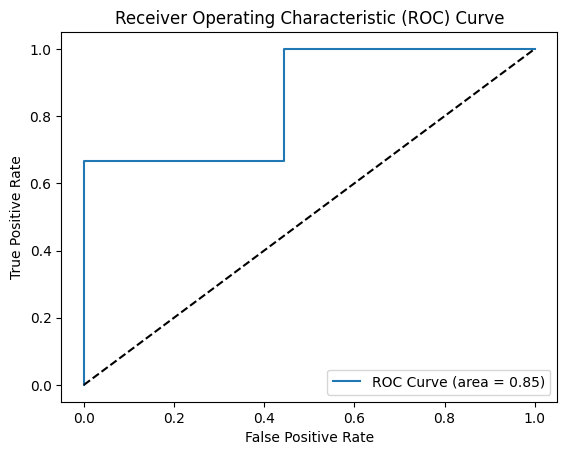

In [17]:
y_true_binary = data['true_label_binary']
y_pred_proba = data['predicted_proba']
roc_auc = roc_auc_score(y_true_binary, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')
fpr, tpr, _ = roc_curve(y_true_binary, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
report = classification_report(y_true, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
                      precision    recall  f1-score   support

         Art Exhibit       1.00      1.00      1.00         1
Entertainment Review       1.00      1.00      1.00         1
        Event Report       1.00      1.00      1.00         1
      Financial News       1.00      1.00      1.00         2
      Political News       1.00      1.00      1.00         1
      Science Report       0.50      0.50      0.50         2
         Sports News       1.00      1.00      1.00         2
   Technology Review       0.50      0.50      0.50         2
        Travel Guide       1.00      1.00      1.00         1
      Weather Update       1.00      1.00      1.00         2

            accuracy                           0.87        15
           macro avg       0.90      0.90      0.90        15
        weighted avg       0.87      0.87      0.87        15

